In [1]:
#Modules to install via pip pandas,ipynb


import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
from functions import *



importing Jupyter notebook from functions.ipynb
Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


Using function to import datas

In [19]:
dataList=coojaJsonImporter("./traces")
test1BH1=dataList[0]
test1BH2=dataList[1]
testNorm =dataList[2]
data=[]
cases=["Normal Network",
      "Black Hole Network 1",
        "Black Hole Network 2"
      ]
for nodeList in dataList:
    data.append(createNodes(nodeList))

nodeListNorm=createNodes(testNorm)
nodeListBH1=createNodes(test1BH1)
nodeListBH2=createNodes(test1BH2)
nodeListNorm[0].pkts[1:5]

#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net
data[0][0].pkts[1:5] 


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


,pkt,rtt,ttl
1,1.0,8170.0,63.0
2,2.0,973.0,63.0
3,3.0,848.0,63.0
4,4.0,1022.0,63.0


Plotting Round trip time in 3 graphs (1 every hop), in every graph there are 3 nodes as the topology is 3X3

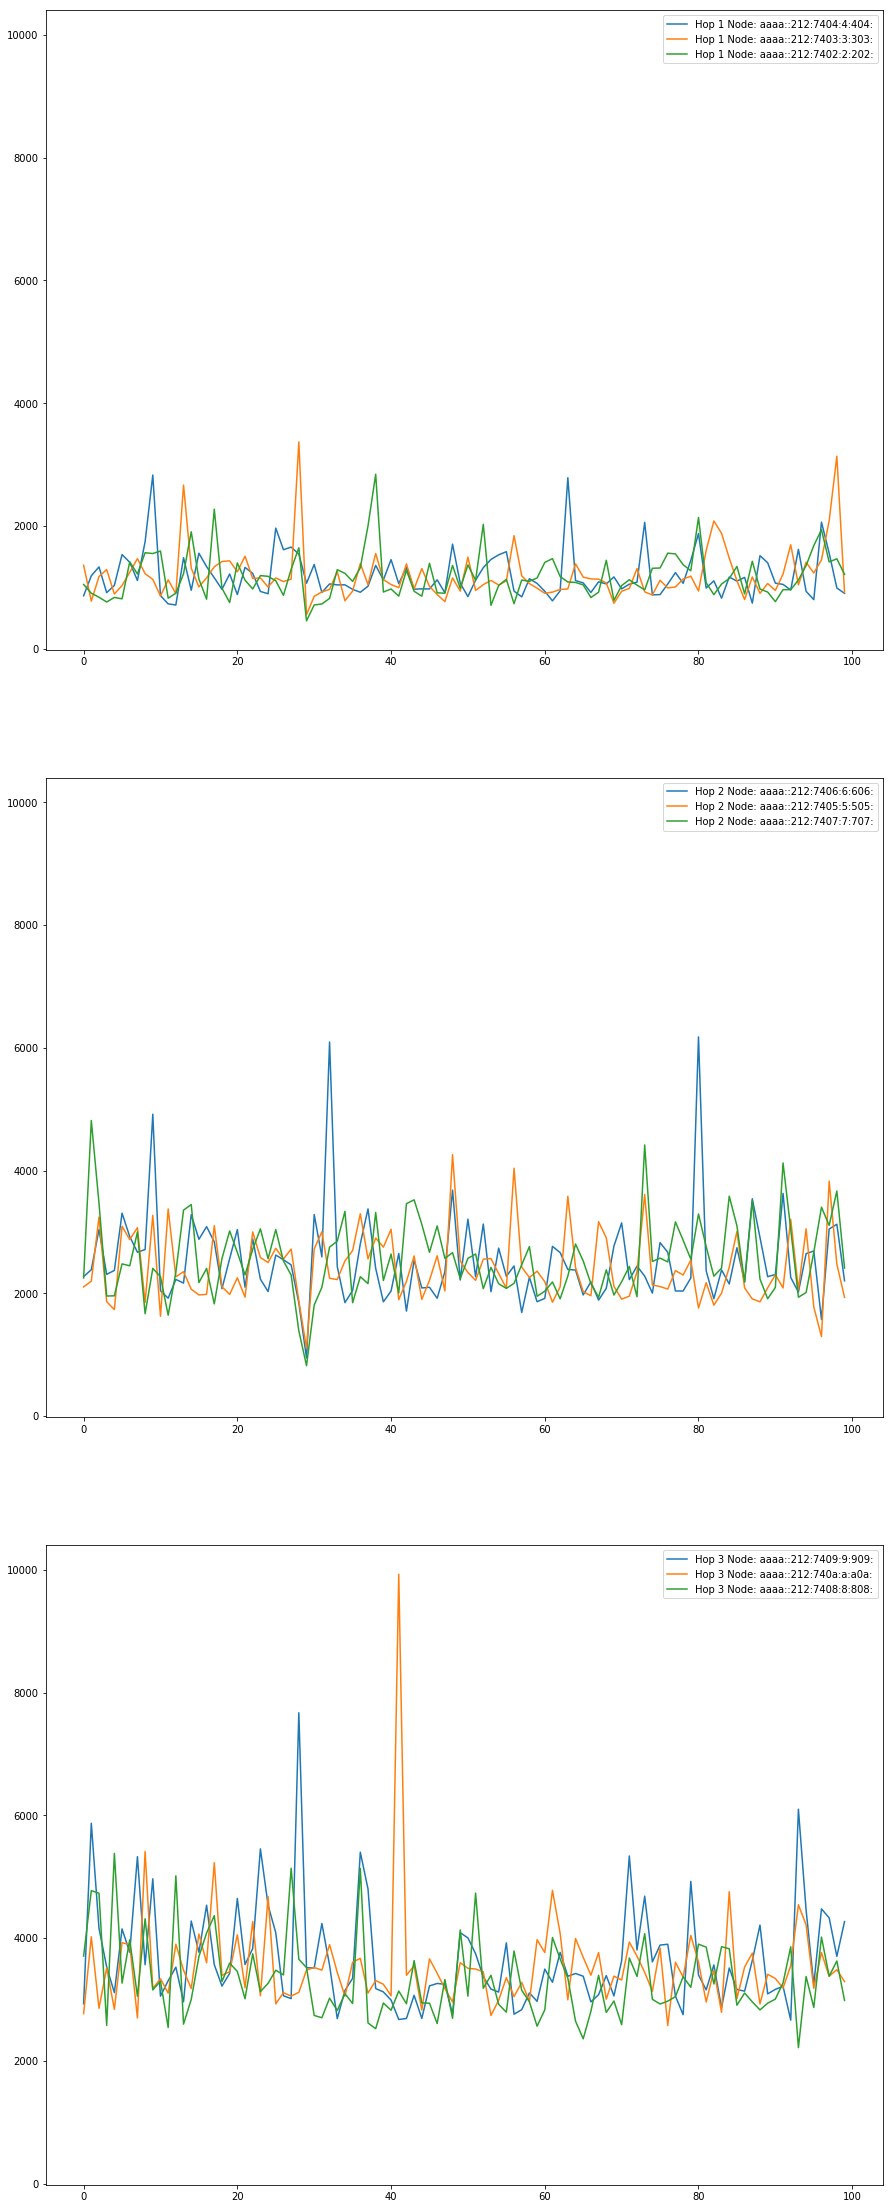

In [3]:
fig, axs= plt.subplots(3,1, figsize=(15,40),sharey=True)

for node in nodeListNorm:
    a=node.hop
    if(a==1):
        axs[0].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop 1 Node: "+node.ip)

    elif(a==2):
        axs[1].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop 2 Node: "+node.ip)

    elif(a==3):
        axs[2].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop 3 Node: "+node.ip)   
        
for ax in axs:
    
    ax.legend()

plt.show()


We print in 9 different Graph the packets RTT in Normal case, Black Hole 1 case and Black Hole 2 case

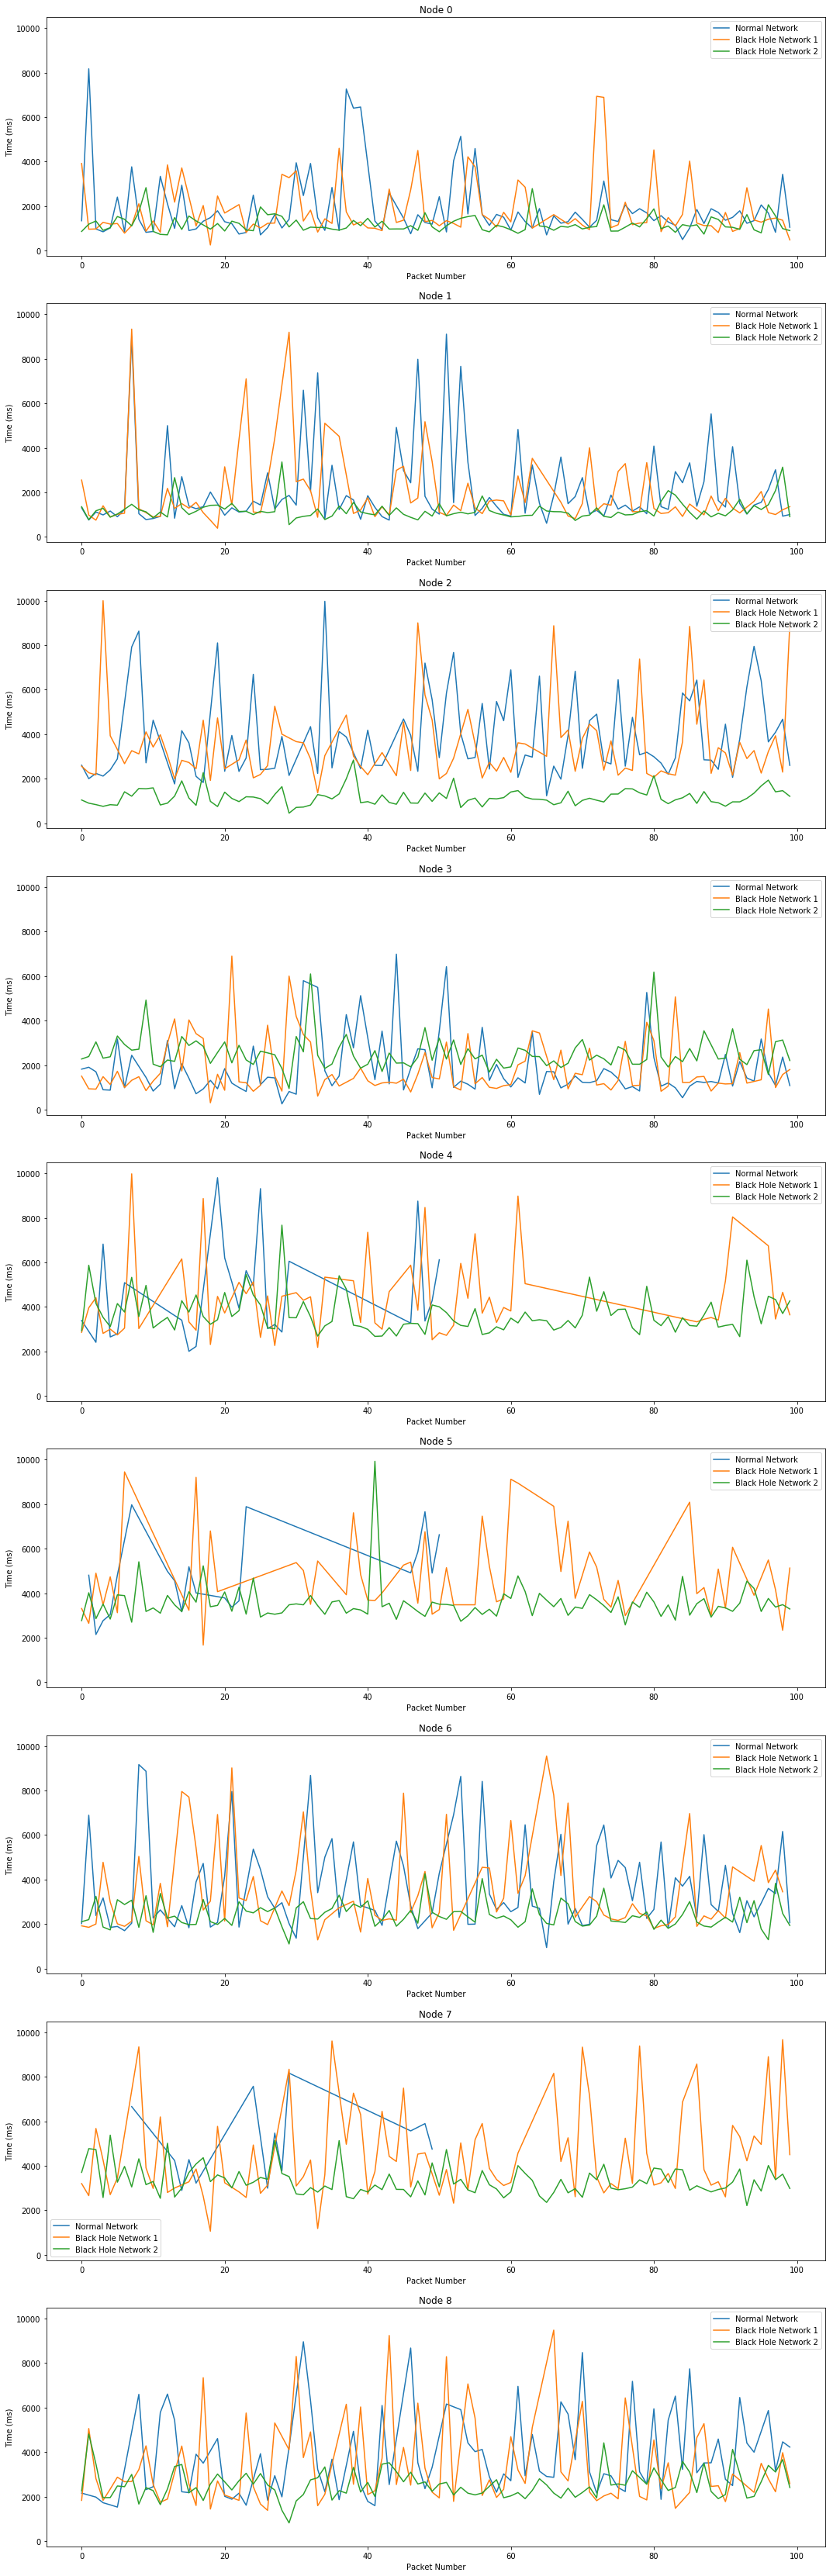

In [20]:
range(len(data))
fig, axs= plt.subplots(9,1, figsize=(18,60),sharey=True, )
for i in range(len(data)):
   
    for j in range(len(data[i])):
        
        #fig, axs= plt.subplots(i,1, figsize=(20,40),sharey=True, sharex=True)
        axs[j].plot(data[i][j].pkts["pkt"],data[i][j].pkts["rtt"],label=cases[i]   )
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Packet Number")
        axs[j].set_ylabel("Time (ms)")
        axs[j].legend()

plt.show()

Get an idea of how the packets in every node are, divided by network.
-Green= Normal Net
-Blue=  Black Hole 1
-Orange=Black Hole 2

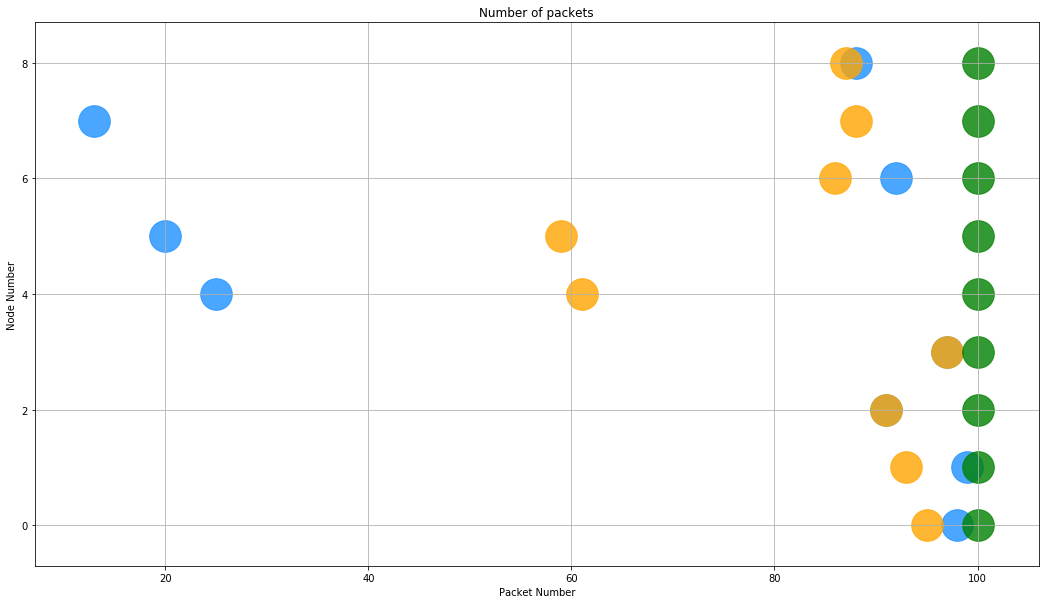

In [5]:
colors = ['dodgerblue', 'orange', 'green']
cases=['Normal','Black Hole 1', 'Black Hole 2']
numberOfPackets=np.zeros(shape=(len(data),len(data[0])))
numberOfPacketsT=numberOfPackets.transpose()

for i in range(len(data)):
    
    for j in range(len(data[i])):
        numberOfPackets[i][j]=len(data[i][j].pkts)
        


fig, axs = plt.subplots(1,figsize=(18,10))
for i in range(len(data)):
    for j in range(len(data[i])):
        axs.scatter(len(data[i][j].pkts),j,1000,
                    label="Node "+ str(j) ,
                    color=colors[i],
                   alpha=0.8)
        axs.set_title("Number of packets")
        axs.set_xlabel("Packet Number")
        axs.set_ylabel("Node Number")
        axs.grid(True)
        #axs.legend()
        



Packet division

-Green= Normal Net
-Blue=  Black Hole 1
-Orange=Black Hole 2

We can see that in the case of normal network we have 100 packets
When in the case of a Black Hole attack we have less packets even 0

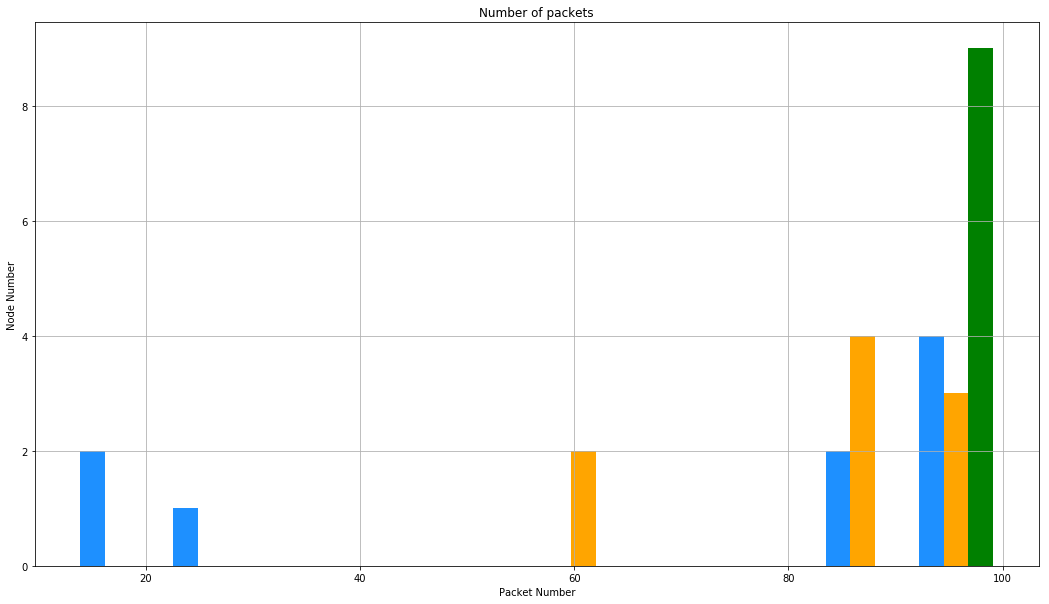

In [21]:
fig, axs = plt.subplots(1,figsize=(18,10))
axs.hist(numberOfPackets.transpose(),
                 color=colors,
                 orientation='vertical',
                 histtype='bar',
                
        )
axs.set_title("Number of packets")
axs.set_xlabel("Packet Number")
axs.set_ylabel("Node Number")
axs.grid(True)
#axs.legend()

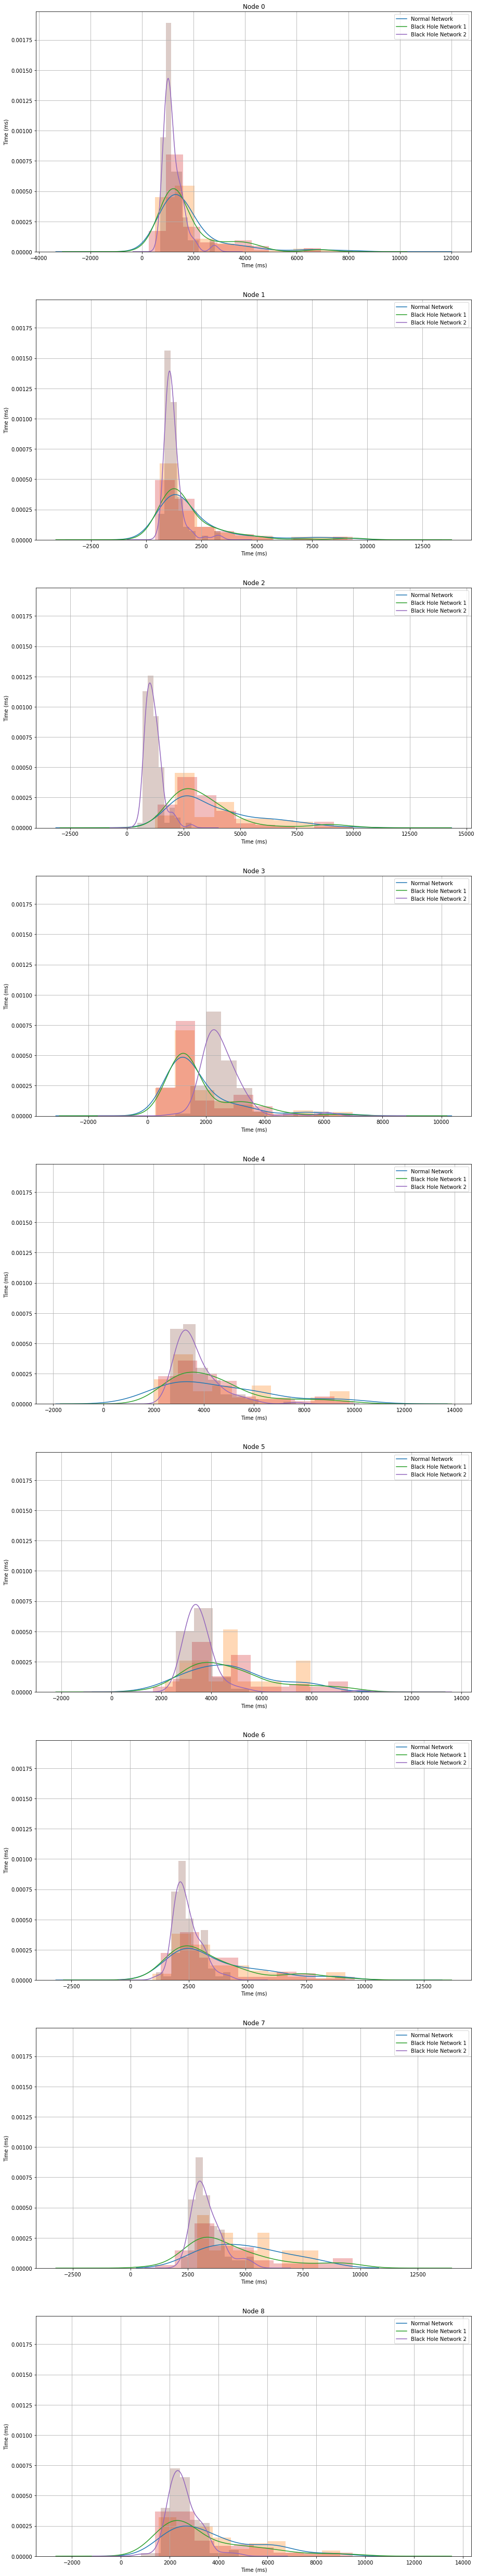

In [22]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j].pkts["rtt"].plot.kde(
            ax=axs[j],
            label=cases[i],
        )
        axs[j].set_ylabel("Time (ms)")
        data[i][j].pkts["rtt"].hist(density=True,alpha=0.3, ax=axs[j])
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Time (ms)")
        axs[j].legend()

Case 1= Normal Network
Case 2= Black Hole 1
Case 3= Black Hole 2

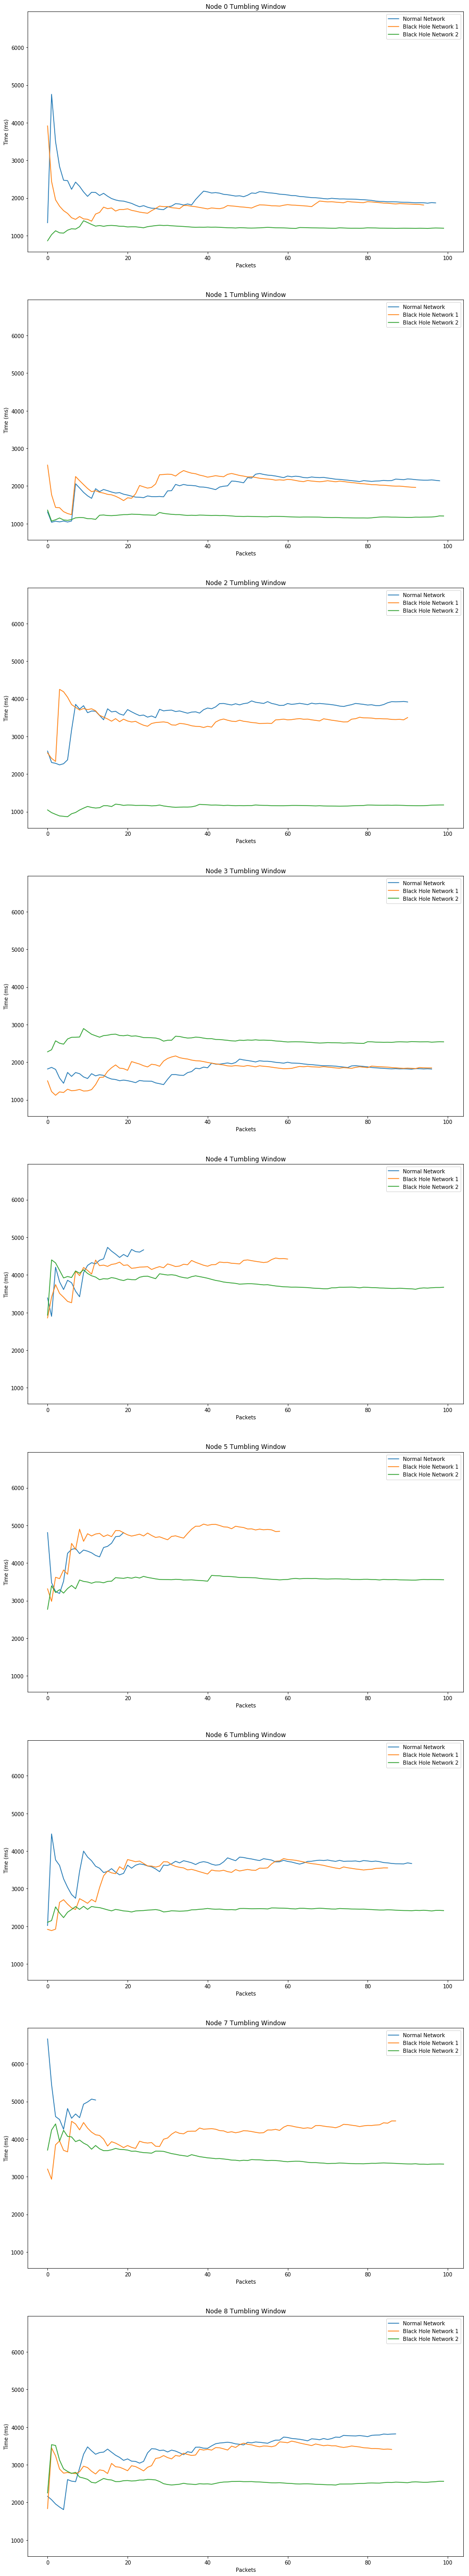

In [41]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(
            data[i][j].pkts["rtt"].expanding(min_periods=1).mean(),
            #data[i][j].pkts["rtt"].groupby(data[i][j].pkts["rtt"].index // 10 * 10).mean(),
               #alpha=0.5,
              label=cases[i])
        axs[j].set_ylabel("Time (ms)")
        axs[j].set_title("Node "+ str(j)+ " Tumbling Window")
        axs[j].set_xlabel("Packets")
        axs[j].legend()

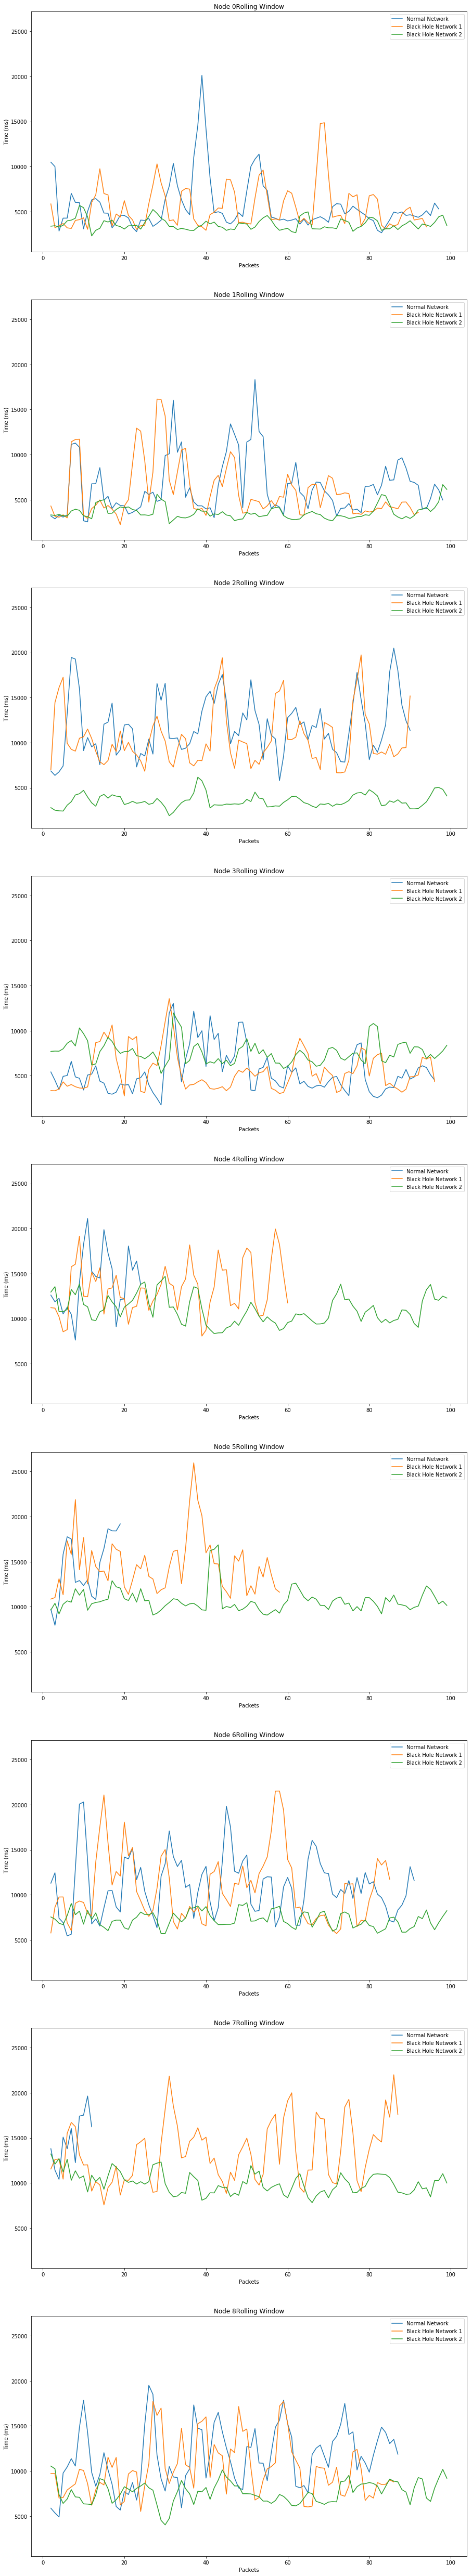

In [40]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(
            data[i][j].pkts["rtt"].rolling(3).sum(),
              
              label=cases[i])
        axs[j].set_ylabel("Time (ms)")
        axs[j].set_title("Node "+ str(j)+ "Rolling Window")
        axs[j].set_xlabel("Packets")
        axs[j].legend()
